In [65]:
k=2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from numpy import save
from numpy import load
import math

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

X=data.iloc[:,0:8]
print(data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [68]:
mean=X.mean(axis=0)
X=X-mean


In [69]:
matrix=np.dot(X.transpose(),X)
print(matrix.shape)

out=data[["Outcome"]]


(8, 8)


In [70]:
eignval,eignvector = np.linalg.eig(matrix)

df1 = pd.DataFrame(eignvector) 
df1=df1.transpose()
df1.insert(loc=0,column='eignval',value=eignval)


df2 =df1.sort_values(by=["eignval"],ascending=False)
Vector=df1.iloc[0:k,1:].transpose()
print(Vector)

          0         1
0 -0.002022  0.022649
1  0.097812  0.972210
2  0.016093  0.141909
3  0.060757 -0.057861
4  0.993111 -0.094627
5  0.014011  0.046973
6  0.000537  0.000817
7 -0.003565  0.140168


In [71]:

print(X.shape,Vector.shape)

(768, 8) (8, 2)


In [72]:
PCA_matrix=np.dot(X,Vector)
PCA_matrix = pd.DataFrame(PCA_matrix, columns = [0,1])
print(PCA_matrix)


             0          1
0   -75.714655  35.950783
1   -82.358268 -28.908213
2   -74.630643  67.906496
3    11.077423 -34.898486
4    89.743788   2.746937
..         ...        ...
763  99.237881 -25.080927
764 -78.641239   7.688010
765  32.113198  -3.376665
766 -80.214494  14.186020
767 -81.308150 -21.621496

[768 rows x 2 columns]


<function matplotlib.pyplot.show(*args, **kw)>

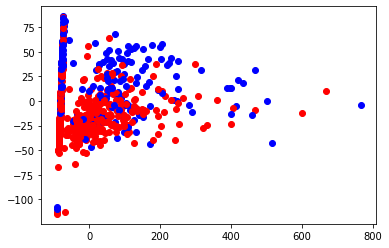

In [73]:
x = PCA_matrix[[0]].values
y=PCA_matrix[[1]].values
n=len(PCA_matrix)
color=["red","blue","yellow"]
for p in range(0,n):
  plt.scatter(x[p],y[p],c=color[out.values[p][0]])

plt.show

Second part 

In [74]:

print(PCA_matrix)
n=len(PCA_matrix)
n_train=math.ceil(n*0.8)
n_test=n-n_train
x_train=PCA_matrix.iloc[0:n_train,:]
x_test=PCA_matrix.iloc[n_train:n,:]
y_train=out.iloc[0:n_train]
y_test=out.iloc[n_train:n]
print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")

             0          1
0   -75.714655  35.950783
1   -82.358268 -28.908213
2   -74.630643  67.906496
3    11.077423 -34.898486
4    89.743788   2.746937
..         ...        ...
763  99.237881 -25.080927
764 -78.641239   7.688010
765  32.113198  -3.376665
766 -80.214494  14.186020
767 -81.308150 -21.621496

[768 rows x 2 columns]
X_train: (615, 2), y_train: (615, 1)
X_test: (153, 2), y_test: (153, 1)


In [75]:
n_col=len(x_train.columns)
print(n_col)

2


In [107]:
n_col=len(x_train.columns)
w=np.random.randn(n_col,1)

y_pred=np.dot(x_train,w)
print(x_train.shape,w.shape,y_train.shape)
m=len(y_train)
lembda=13
loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+lembda*(np.dot(w.transpose(),w))/2

print(loss)

(615, 2) (2, 1) (615, 1)
[[76.20738897]]


[[-1.37198174]
 [-0.47458178]]


In [91]:
gw=(-1/m)*np.dot(x_train.transpose(),(y_train-y_pred))+lembda*w
print(gw)
alpha=1e-1
w=w-alpha*gw

[[-23656.35283742]
 [  -713.16842471]]


In [120]:
itr=0
m=len(x_train)
alpha=0.0001
lembda=10
w=np.random.randn(n_col,1)
wlist=[]
losslist=[]
itrlist=[]
while(itr!=100):
  y_pred=np.dot(x_train,w)
  loss=(1/(2*m))*np.dot((y_train-y_pred).transpose(),(y_train-y_pred))+(lembda*(np.dot(w.transpose(),w))/2)
  if itr==99:
    print(f"itr:{itr}, loss{loss}")
  
  
  
  gw=(-1/m)*np.dot(x_train.transpose(),(y_train-y_pred))+lembda*w
  w=w-alpha*gw
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss[0][0])
  itr=itr+1
  

print(w)

itr:99, loss[[0.15107976]]
[[0.00064676]
 [0.00635781]]


taking image of point on best fit line by X.W 

In [121]:
pred_train=np.dot(x_train,w)
pred_test =np.dot(x_test,w) 
print(pred_train.shape,pred_test.shape)

(615, 1) (153, 1)


In [122]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse} test_MSE: {test_mse}")

train_MSE: Outcome    0.301751
dtype: float64 test_MSE: Outcome    0.288116
dtype: float64


In [125]:

pred = np.dot(x_test, w)
sum=0
for i in range(len(pred)):
  if y_test.iloc[i][0]==0:
    if ((pred[i][0]*(-1)) >= 0):
      sum+=1
  else:
    if (pred[i][0]*y_test.iloc[i][0]) >= 0:
      sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 71.89542483660131


In [126]:
pred = np.dot(x_train, w)
sum=0
for i in range(len(pred)):
  if y_train.iloc[i][0]==0:
    if ((pred[i][0]*(-1)) >= 0):
      sum+=1
  else:
    if (pred[i][0]*y_train.iloc[i][0]) >= 0:
      sum+=1
  

accuracy = sum/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 70.40650406504065


<function matplotlib.pyplot.show(*args, **kw)>

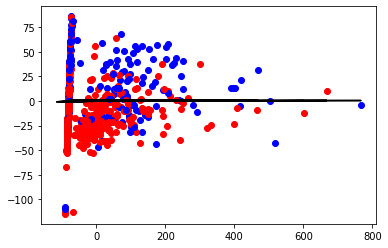

In [135]:
x = x_train[[0]].values
y=x_train[[1]].values

n=len(PCA_matrix)
color=["red","blue","yellow"]
for p in range(0,len(x_train)):
  plt.scatter(x[p],y[p],c=color[out.values[p][0]])
plt.plot(x_train,pred_train,c="black")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

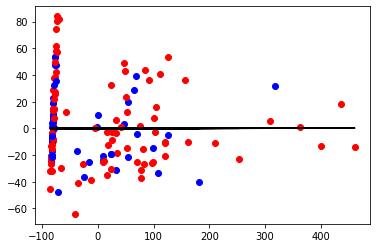

In [136]:
x = x_test[[0]].values
y=x_test[[1]].values

n=len(PCA_matrix)
color=["red","blue","yellow"]
for p in range(0,len(x_test)):
  plt.scatter(x[p],y[p],c=color[out.values[p][0]])
plt.plot(x_test,pred_test,c="black")
plt.show